In [1]:
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data_inicial = np.load('C:/Users/jose-/Documents/Maestria/Python1/proyecto_data/proyecto_training_data.npy')

In [3]:
np.random.seed(2)
sub1 = np.random.choice(range(data_inicial.shape[0]), int(data_inicial.shape[0]*0.8))
sub2 = np.setdiff1d(range(data_inicial.shape[0]),sub1)
data_entrenamiento = data_inicial[sub1]
data_validacion = data_inicial[sub2]

In [4]:
for i in range(data_inicial.shape[1]):
    print('Para la columna ',i,' tenemos lo siguiente:')
    print('   La media es de:',np.mean(data_inicial[:,i]))
    print('   EL máximo valor es de:',np.max(data_inicial[:,i]))
    print('   El mínimo valor es de:',np.min(data_inicial[:,i]))
    print('   El rango es de:',np.max(data_inicial[:,i])-np.min(data_inicial[:,i]))
    print('   La desviación estándar es de:',np.std(data_inicial[:,i]))


Para la columna  0  tenemos lo siguiente:
   La media es de: 180921.19589041095
   EL máximo valor es de: 755000.0
   El mínimo valor es de: 34900.0
   El rango es de: 720100.0
   La desviación estándar es de: 79415.29188606751
Para la columna  1  tenemos lo siguiente:
   La media es de: 6.0993150684931505
   EL máximo valor es de: 10.0
   El mínimo valor es de: 1.0
   El rango es de: 9.0
   La desviación estándar es de: 1.3825228366585953
Para la columna  2  tenemos lo siguiente:
   La media es de: 1162.626712328767
   EL máximo valor es de: 4692.0
   El mínimo valor es de: 334.0
   El rango es de: 4358.0
   La desviación estándar es de: 386.45532230228963
Para la columna  3  tenemos lo siguiente:
   La media es de: 6.517808219178082
   EL máximo valor es de: 14.0
   El mínimo valor es de: 2.0
   El rango es de: 12.0
   La desviación estándar es de: 1.624836553698191
Para la columna  4  tenemos lo siguiente:
   La media es de: 1971.267808219178
   EL máximo valor es de: 2010.0
   El m

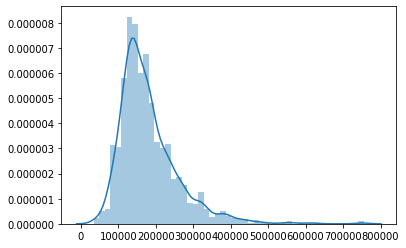

In [5]:
seaborn.distplot(data_inicial[:,0][~np.isnan(data_inicial[:,0])] )

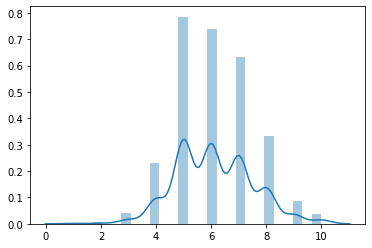

In [6]:
seaborn.distplot(data_inicial[:,1][~np.isnan(data_inicial[:,1])] )

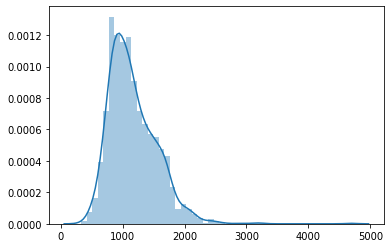

In [7]:
seaborn.distplot(data_inicial[:,2][~np.isnan(data_inicial[:,2])] )

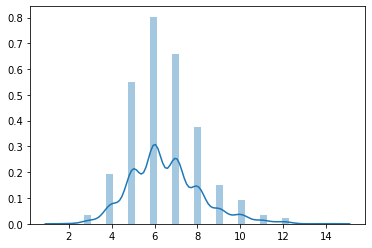

In [8]:
seaborn.distplot(data_inicial[:,3][~np.isnan(data_inicial[:,3])] )

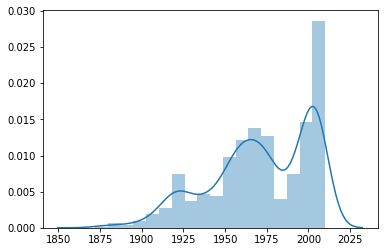

In [9]:
seaborn.distplot(data_inicial[:,4][~np.isnan(data_inicial[:,4])] )

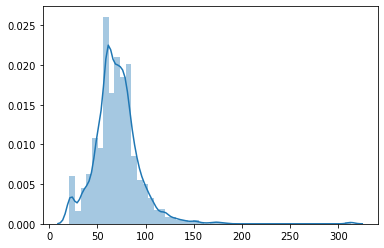

In [10]:
seaborn.distplot(data_inicial[:,5][~np.isnan(data_inicial[:,5])] )

In [11]:
y = data_entrenamiento[:,0]
names = ['','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
names

['', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

In [13]:
las_corr = [[]]
for i in range(1,6):
    las_corr.append(np.corrcoef(data_inicial[:,i][~np.isnan(data_inicial[:,i])],data_inicial[:,0][~np.isnan(data_inicial[:,i])])[0,1])
las_corr
names[1]+' con coeficiente de correlación de: ' + str(las_corr[1])

'OverallQual con coeficiente de correlación de: 0.7909816005838047'

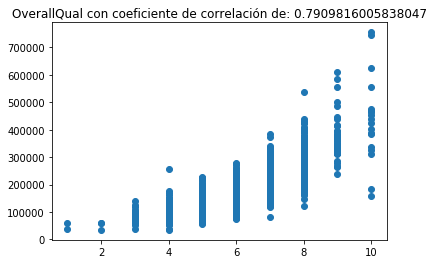

In [15]:
plt.scatter(data_inicial[:,1],data_inicial[:,0])
plt.title(names[1]+' con coeficiente de correlación de: ' + str(las_corr[1]))
plt.show()

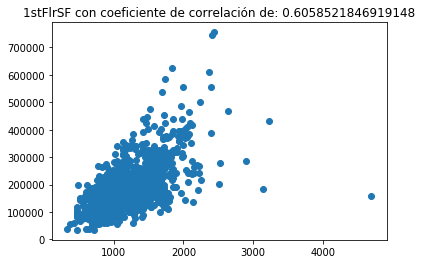

In [16]:
plt.scatter(data_inicial[:,2],data_inicial[:,0])
plt.title(names[2]+' con coeficiente de correlación de: ' + str(las_corr[2]))
plt.show()

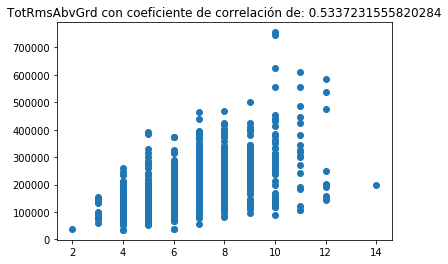

In [17]:
plt.scatter(data_inicial[:,3],data_inicial[:,0])
plt.title(names[3]+' con coeficiente de correlación de: ' + str(las_corr[3]))
plt.show()

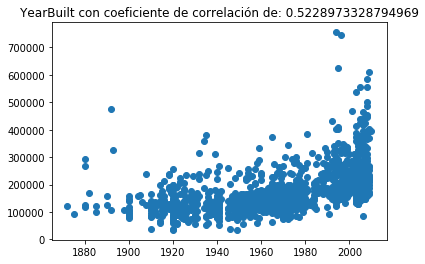

In [18]:
plt.scatter(data_inicial[:,4],data_inicial[:,0])
plt.title(names[4]+' con coeficiente de correlación de: ' + str(las_corr[4]))
plt.show()

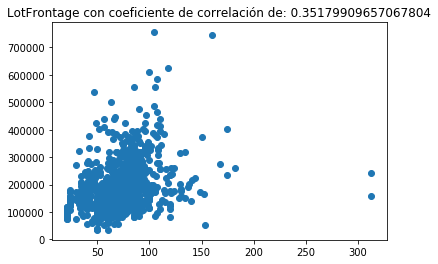

In [19]:
plt.scatter(data_inicial[:,5][~np.isnan(data_inicial[:,5])],data_inicial[:,0][~np.isnan(data_inicial[:,5])])
plt.title(names[5]+' con coeficiente de correlación de: ' + str(las_corr[5]))
plt.show()

De donde vemos que las mejores dos variables son OverallQual y 1stFlrSF que son las dos variables que seguirán en el modelo.

In [20]:
def modelo_regresion1(x,y,epochs,imprimir_error_cada,lr):
    mat_piv = np.transpose(np.array([x,np.ones_like(x)]))
    m,b = np.mean(y)/np.mean(x),1
    vec_piv = [m,b]
    errorres = []
    iteraciones = [vec_piv]
    for i in range(epochs):
        yhat = np.dot(mat_piv , vec_piv)
        #print('yhat: ',yhat,'error: ',0.5 * np.mean((yhat-y)**2))
        errorres.append(0.5 * np.mean((yhat-y)**2))
        diff =  np.array(yhat-y)
        g =  np.matmul(np.array(yhat-y),mat_piv)/len(y)
        #print(g)
        vec_piv -= lr*g
        #print(vec_piv)
        iteraciones.append(vec_piv)
        if (i+1)%imprimir_error_cada == 0:
            print(vec_piv)
            print(g)
            print(i,0.5* np.mean((yhat-y)**2))
    return  iteraciones,errorres

iteraciones,errores = modelo_regresion1(np.array([1,2,3,4,5]),np.array([2,2,4,5,6]),5,1,0.001)

[1.26333333 0.999     ]
[3.33333333 1.        ]
0 0.5977777777777776
[1.26003967 0.998011  ]
[3.29366667 0.989     ]
1 0.5857382777777774
[1.2567852  0.99703287]
[3.25446933 0.97813   ]
2 0.5739818433567772
[1.25356946 0.99606548]
[3.21573578 0.96738846]
3 0.5625018163082139
[1.250392   0.99510871]
[3.17746052 0.95677387]
4 0.5512916950393962


In [ ]:
#iteraciones,errores = modelo_regresion1(data_inicial[:,1],y,100,10,0.04)
#errores

In [22]:
def visulizar_errores(vector_errores):
    plt.plot(vector_errores)
    plt.title('Errores')
    plt.show()

In [39]:
def visualizar_modelo(x,y,vector_modelos,imprimir_cada):
    max_x = np.max(x)
    cantidad_x = len(Counter(x))
    mat_piv = np.transpose(np.array([np.linspace(0, max_x,cantidad_x ),np.ones_like(np.linspace(0, max_x, cantidad_x))]))
    for i in range(1,len(vector_modelos)//imprimir_cada+1):
        vec_piv = [vector_modelos[i*imprimir_cada-1][0],vector_modelos[i*imprimir_cada-1][1]]
        yhat = np.dot(mat_piv , vec_piv)
        plt.plot(mat_piv[:,0], yhat)
    plt.scatter(x,y)
    plt.title('x y')
    plt.show()
#visualizar_modelo(np.array([1,2,3]),np.array([2,2,4]),iteraciones,1)

In [25]:
iteraciones1,errores1 = modelo_regresion1(data_entrenamiento[:,1],y,10000,1000,0.01)

[ 35383.1111551 -34096.7060407]
[-414.46571355 2634.90560968]
999 1032494418.3910186
[ 38641.44040969 -54811.06129464]
[-250.97538477 1595.53957686]
1999 987572304.1828864
[ 40614.4876646  -67354.42280836]
[-151.97552343  966.1623293 ]
2999 971100346.1967067
[ 41809.24582621 -74949.92438856]
[-92.0271912  585.04950932]
3999 965060439.0222273
[ 42532.71915467 -79549.30105419]
[-55.72610464 354.27062097]
4999 962845736.9991325
[ 42970.81087383 -82334.40556492]
[-33.74436074 214.52487505]
5999 962033654.1459677
[ 43236.09273958 -84020.89651786]
[-20.43354527 129.9032979 ]
6999 961735881.1031264
[ 43396.73140317 -85042.13350318]
[-12.37331996  78.66158553]
7999 961626694.232972
[ 43494.00446843 -85660.53289534]
[-7.49253469 47.63270169]
8999 961586657.7928014
[ 43552.90715732 -86034.99818961]
[-4.53702614 28.8434851 ]
9999 961571977.3047607


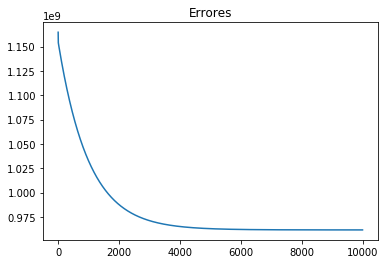

In [26]:
visulizar_errores(errores1)

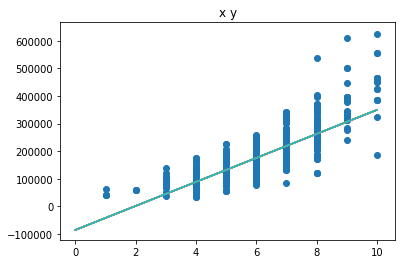

In [40]:
visualizar_modelo(data_entrenamiento[:,1],y,iteraciones1,1000)

In [41]:
iteraciones2,errores2 = modelo_regresion1(data_entrenamiento[:,2],y,1000,100,0.0000011)
#errores

[153.87456657   1.25012323]
[ 1.83111055e+00 -2.28850959e+03]
99 1702239859.6666782
[153.87436515   1.501858  ]
[ 1.83109203e+00 -2.28848646e+03]
199 1702239283.5717278
[153.87416373   1.75359022]
[ 1.83107349e+00 -2.28846333e+03]
299 1702238707.4884224
[153.87396231   2.0053199 ]
[ 1.8310550e+00 -2.2884402e+03]
399 1702238131.4167614
[153.8737609    2.25704704]
[ 1.83103654e+00 -2.28841707e+03]
499 1702237555.3567445
[153.87355948   2.50877163]
[ 1.83101797e+00 -2.28839394e+03]
599 1702236979.308372
[153.87335807   2.76049368]
[ 1.83099953e+00 -2.28837082e+03]
699 1702236403.2716434
[153.87315666   3.01221319]
[ 1.83098101e+00 -2.28834769e+03]
799 1702235827.2465584
[153.87295526   3.26393015]
[ 1.83096248e+00 -2.28832456e+03]
899 1702235251.2331166
[153.87275385   3.51564457]
[ 1.83094400e+00 -2.28830143e+03]
999 1702234675.2313182


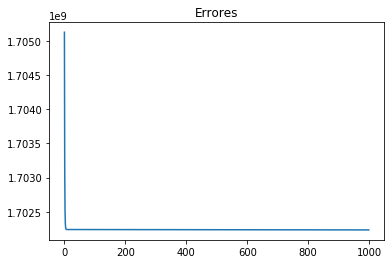

In [42]:
visulizar_errores(errores2)

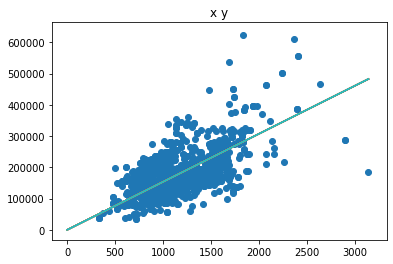

In [44]:
visualizar_modelo(data_entrenamiento[:,2],y,iteraciones2,100)

In [49]:
x =data_entrenamiento[:,1]
x = x.reshape(-1,1)
y = y.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
#reg.predict(np.array([[3, 5]]))

array([[131606.802837  ],
       [306180.11952746],
       [131606.802837  ],
       ...,
       [175250.13200962],
       [175250.13200962],
       [131606.802837  ]])

In [73]:
def media_preds(coefs_manual,modelo_learn,arreglo_a_pred):
    mat_piv = np.transpose(np.array([arreglo_a_pred,np.ones_like(arreglo_a_pred)]))
    vec_piv = coefs_manual
    yhat = np.dot(mat_piv , vec_piv)
    ylearn = modelo_learn.predict(arreglo_a_pred)
    ylearn = ylearn.reshape(1,-1)
    y_mean = (yhat+ylearn)*0.5
    #return yhat.shape,ylearn.shape,y_mean.shape
    return yhat,ylearn,y_mean

#media_preds(iteraciones1[len(iteraciones1)-1],reg,x)

(array([[131729.53759701, 305941.16622631, 131729.53759701, ...,
         175282.44475434, 175282.44475434, 131729.53759701]]),
 array([[131606.802837  , 306180.11952746, 131606.802837  , ...,
         175250.13200962, 175250.13200962, 131606.802837  ]]),
 array([[131668.17021701, 306060.64287689, 131668.17021701, ...,
         175266.28838198, 175266.28838198, 131668.17021701]]))

In [81]:
x1=data_validacion[:,1]
x1=x1.reshape(-1,1)
x.shape,x1.shape
media_preds(iteraciones1[len(iteraciones1)-1],reg,x)

(array([[131729.53759701, 305941.16622631, 131729.53759701, ...,
         175282.44475434, 175282.44475434, 131729.53759701]]),
 array([[131606.802837  , 306180.11952746, 131606.802837  , ...,
         175250.13200962, 175250.13200962, 131606.802837  ]]),
 array([[131668.17021701, 306060.64287689, 131668.17021701, ...,
         175266.28838198, 175266.28838198, 131668.17021701]]))

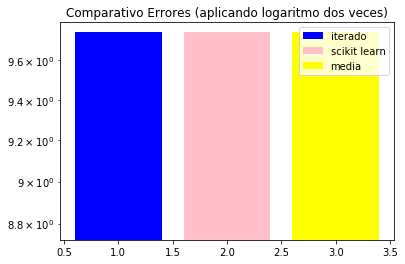

(9.744918549997323, 9.745550463821658, 9.74523445609099)

In [109]:
def calcula_errores(y_manual,y_modelo,y_mean,y_real):
    error_manual = 0.5 * np.mean((y_manual-y_real)**2)
    error_modelo = 0.5 * np.mean((y_modelo-y_real)**2)
    error_mean = 0.5 * np.mean((y_mean-y_real)**2)
    plt.bar([1],[np.log10(error_manual)],log=True,color = ['blue'],label='iterado')
    plt.bar([2],[np.log10(error_modelo)],log=True,color = ['pink'],label='scikit learn')
    plt.bar([3],[np.log10(error_mean)],log=True,color = ['yellow'],label='media')
    plt.title('Comparativo Errores (aplicando logaritmo dos veces)')
    plt.legend()
    plt.show()
    return np.log10(error_manual),np.log10(error_modelo),np.log10(error_mean)

y_validacion = data_validacion[:,0].reshape(-1, 1)
vects_pred = media_preds(iteraciones1[len(iteraciones1)-1],reg,x)
calcula_errores(vects_pred[0],vects_pred[1],vects_pred[2],y_validacion)
    